<h1> Testing Methods for 2 Sample Z test Example </h1>

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import scipy.stats.distributions as dist
import math
from statistics import stdev
from statsmodels.stats.proportion import proportions_ztest
# can we assume anything from our sample
alpha = 0.05

In [3]:
# Load CSV file
heart_csv = pd.read_csv("data/heart.csv")
heart_csv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Text(33.0, 0.5, 'Exercise Angina')

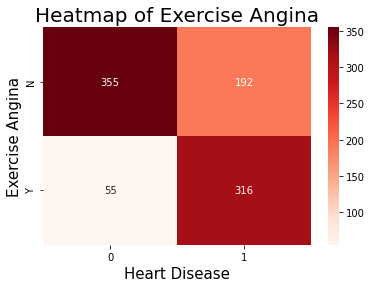

In [37]:
#creating cross tab to form heatmap 
#showing sex with Heart Disease
heat_sex = pd.crosstab(heart_csv['ExerciseAngina'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')

#heat map of sexes with heart disease
sns.heatmap(heat_sex,annot=True, cmap= 'Reds',fmt='g')
#labels for heatmap
plt.title('Heatmap of Exercise Angina', fontsize = 20) # title with fontsize 20
plt.xlabel('Heart Disease', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Exercise Angina', fontsize = 15) # y-axis label with fontsize 15

<h2> Method 1 </h2> 
<h4> Using statsmodels package </h4>

<p> From the crosstab created from above, we know from above the exercise angina (EA) positive and negative values of those who have heart disease, and once you add the two columns together for the exercise angina values, you have the total from the dataset </p>
<p> For this statstical test, we are using a 2-sample proportion Z test as we are trying to determine if the proportion of individuals with Exercise Angina with heard disease is greater than that of individuasl without Exercise Angina with heart disease.</p>
<p> H<sub>O</sub>:  p<sub>Y</sub> = p<sub>N</sub></p>
<p> H<sub>A</sub>: p<sub>Y</sub>  $\neq$p<sub>N</sub></p>
<p> Use the information from the cross tab to fill in the sample_HD_YEA (the amount of people with positive EA), sample_size_YEA, sample_HD_NEA, sample_size_NEA</p>

In [6]:
sample_HD_YEA, sample_size_YEA = (192, 547)
sample_HD_NEA, sample_size_NEA = (316, 371)

In [7]:
# check our sample against Ho for Ha != Ho
successes = np.array([sample_HD_YEA, sample_HD_NEA])
samples = np.array([sample_size_YEA, sample_size_NEA])

In [8]:
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

In [9]:
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -14.976, p_value: 0.000


In [38]:
if p_value > alpha:
    print('Our p-value is: %0.3f. We Fail to reject the null hypothesis. There is not sufficient evidence at alpha = %.02f to suggest that the population proportion for those with exercise angina who have heart disease is not equal to that of those who do not have exercise angina.' % (p_value, alpha))
else:
    print('Our p-value is: %0.3f. We reject the null hypothesis. There is sufficient evidence at alpha = %.02f to suggest that the population proportion for those with exercise angina who have heart disease is not equal to that of people who do not have exercise angina.' % (p_value, alpha))

Our p-value is: 0.000. We reject the null hypothesis. There is sufficient evidence at alpha = 0.05 to suggest that the population proportion for those with exercise angina who have heart disease is not equal to that of people who do not have exercise angina.


<h2> Method 2</h2>
<h4> calculating it by "hand"</h4>

In [34]:
#Calculating P hat and Q hat for men
#calculate p hat
EAY_p = heart_csv[(heart_csv["ExerciseAngina"] == "Y")]["HeartDisease"].mean()
#calculate n1
EAY_n = heart_csv[heart_csv.ExerciseAngina=="Y"].shape[0]

#print the values of the p hat and n1
print("The p hat for exercise angina postive individuals is: %.3f. The value of the sample: %.0f." % (exangY_p, exangY_n))

The p hat for exercise angina postive individuals is: 0.852. The value of the sample: 371.


In [35]:
#Calculating P hat and Q hat for men
#calculate p hat
EAN_p = heart_csv[(heart_csv["ExerciseAngina"] == "N")]["HeartDisease"].mean()
#calculate n1
EAN_n = heart_csv[heart_csv.ExerciseAngina=="N"].shape[0]

#print the values of the p hat and n1
print("The p hat for exercise angina negative individuals is: %.3f. The value of the sample: %.0f." % (exangN_p, exangN_n))

The p hat for exercise angina negative individuals is: 0.351. The value of the sample: 547.


<p> These values are constant with the values we found within the cross tab. We will check those values another way below using a proportion column</p>

In [31]:
#This table helps us to calculate the SE.
prop = heart_csv.groupby("ExerciseAngina")["HeartDisease"].agg([lambda z: np.mean(z==1), "size"])
prop.columns = ['proportions_with_Heart_Disease','total_counts']
prop.head()

,proportions_with_Heart_Disease,total_counts
ExerciseAngina,,
N,0.351005,547
Y,0.851752,371


<p> Now that we know what the values are known, we can apply them to the equation for the z test statistic.
The 2 sample Z Test for proportions test statistics is as follows:
    $$Z = (\hat{p_1} - \hat{p_2})/ \sqrt{ \hat{pc}(1-\hat{pc})(1/n_1 + 1/n_2)}$$
    </p>
    <p> in our case: those values those variables are as follows: </p>
    
    

<ul>
    <li> Z: the number of standard deviations a value is from the center</li>
        <li>$\hat{p_y}$: proportion of people with Exercise Angina with heart disease</li>
        <li>$\hat{p_n}$: proportion of people without Exercise Angina with heart disease</li> 
        <li>$\hat{p_c}$: The two combined or pooled proportion of success (has heart disease) </li>
        <li> $n_y$: the total sample size of those with Exercicse Angina </li>
        <li> $n_n$: the total sample size of those without Exercicse Angina  </li>
</ul>

In [39]:

total_proportion_HD = (heart_csv.HeartDisease == 1).mean()

#Calculating standard error
 
variance = total_proportion_HD * (1 - total_proportion_HD)
standard_error = np.sqrt(variance * (1 / prop.total_counts.N + 1 / prop.total_counts.Y))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.03343657814549315


In [41]:
# Calculate the test statistic 
best_estimate = (prop.proportions_with_Heart_Disease.Y - prop.proportions_with_Heart_Disease.N )
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is 0.5007465371026476
Computed Test Statistic is 14.976010252117927


In [47]:
# Calculate the  p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)
print("Our pvalue is", pvalue, ". There is sufficient evidence at alpha = 0.05 to suggest that the true population proportion of those with exerice angina who have heart disease is greater than that of the true population proportion who do not have exercise angina who have heart disease")

Computed P-value is 1.053546511099004e-50
Our pvalue is 1.053546511099004e-50 . There is sufficient evidence at alpha = 0.05 to suggest that the true population proportion of those with exerice angina who have heart disease is greater than that of the true population proportion who do not have exercise angina who have heart disease


Because the z score is higher than 3, we can assume that the pvalue is 0. Any value of z after 3 is assumed to be 0.
<p> Our p-value is 0. We reject the null hypothesis. There is sufficient evidence at alpha = 0.05 to suggest that the population proportion for men with heart disease is not equal to that of women.</p>